<h1> 의사결정 나무

<h3> 특징

1. 해석이 쉽다.
2. 빠르다

<h3> 파라미터

- min_samples_split : 의사결정 나무에서 각 구간의 최소 샘플 수.
이것보다 작으면 더이상 분리되지 않음

[20_머신러닝 예측확률 높이기 with KNN]
코드를 그대로 사용

In [8]:
import pandas as pd
import os  # 경로를 불러오는 패키지

In [9]:
os.chdir(r'C:\Users\hjb38\Documents\데이터 분석 과정\data')
# 앞에 r 붙여줘야함

In [10]:
iris = pd.read_csv("IRIS.csv")

In [11]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris['species'].value_counts()  # 꽃의 종류

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [13]:
iris['id'] = range(len(iris))  # 각각의 객체를 구별하기 위해 id 라는 컬럼을 새로 추가
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,id
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4.6,3.1,1.5,0.2,Iris-setosa,3
4,5.0,3.6,1.4,0.2,Iris-setosa,4


In [14]:
iris = iris[['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']]
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# train 데이터 학습 한줄로 요약
train = iris.sample(100, replace = False, random_state = 2020).reset_index().drop(['index'], axis=1)

In [17]:
# test 데이터 한줄로 요약
test = iris.loc[~iris['id'].isin(train['id'])].reset_index().drop(['index'], axis=1)

In [21]:
train.columns

Index(['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<h1> 의사결정 나무 실습

<h3> 특징

1. 해석이 쉽다.
2. 빠르다

<h3> 파라미터

- min_samples_split : 의사결정 나무에서 각 구간의 최소 샘플 수.
이것보다 작으면 더이상 분리되지 않음

<h2> 1) 의사결정나무 학습시키기

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# 최소 샘플수는 임의로 10으로
dt = DecisionTreeClassifier(min_samples_split = 10)

In [24]:
# train 학습(인풋변수, 타겟변수)
dt.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species'])

DecisionTreeClassifier(min_samples_split=10)

In [28]:
# 예측
predictions = dt.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [29]:
# 위 predictions를 test 데이터의 컬럼으로 저장
test['pred'] = predictions

In [31]:
# 예측값과 실제값을 비교 후 비율계산
(test['pred'] == test['species']).mean() 

0.96

<h2> 2) 모델 시각화 하고 해석해보기

In [33]:
from sklearn import tree
import matplotlib.pyplot as plt

In [37]:
# 그림의 크기조정을 위한 패키지
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 10

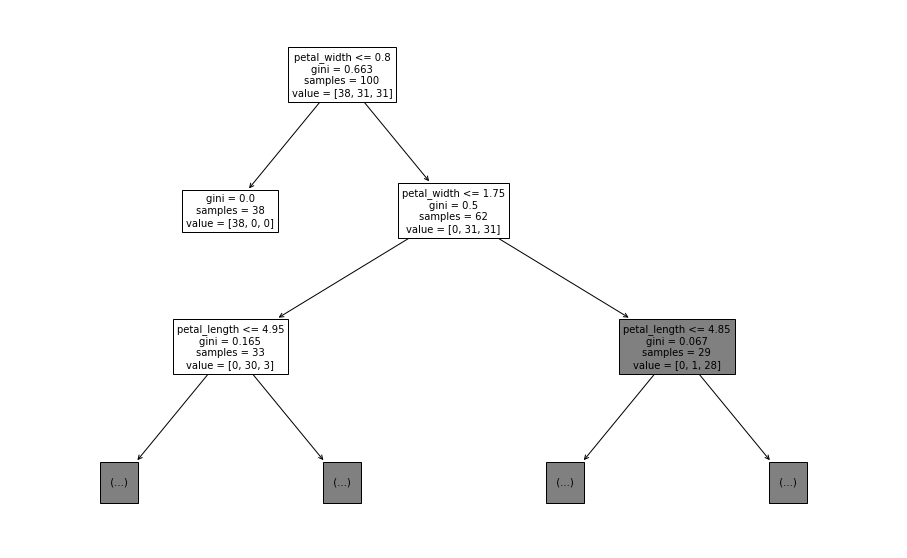

In [39]:
# tree.plot_tree 함수에는 아래 3가지 인자가 들어가야한다.
# (학습시킨 모델, feature_names=[인풋변수], 폰트사이즈)
a = tree.plot_tree( dt,
                   feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                   fontsize=10,
                   max_depth=2)  # 시각화 되는 최소크기. 그 이하로는 (...)으로 생략
plt.show(a)

★ 추가적으로 모델성능 측정의 신뢰성을 높이는 방법
<h2> 3th fold Cross Validation

-> train 데이터와 test 데이터를 한 번씩만 지정해서 계산한 것이 아닌,
데이트들을 세 구간으로 나누어 세 가지 정확도를 모두 계산한 뒤 평균을 내는 것

3번 보다 많이 나눠도 됨

In [40]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [41]:
dt = DecisionTreeClassifier(min_samples_split = 10)

In [42]:
# 인풋변수와 타겟변수. cv는 데이터를 몇 등분 할 것인지.
cross_val_score(dt, iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris['species'], cv=3)
# 그럼 3개의 정확도가 나옴

array([0.98, 0.94, 0.98])

In [43]:
# 3개의 정확도 평균 내기
np.mean(cross_val_score(dt, iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], iris['species'], cv=3))

0.9666666666666667